In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import pickle
import numpy
from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.orbit import Orbit
from galpy.df import streamdf
from galpy.util import bovy_plot, bovy_conversion, bovy_coords
import seaborn as sns
import MWPotential2014Likelihood
import pal5_util
_REFR0, _REFV0= MWPotential2014Likelihood._REFR0, MWPotential2014Likelihood._REFV0
%pylab inline
from matplotlib import cm
save_figures= False

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# Exploration of the Milky Way's dark halo shape using the Palomar 5 stream

## The data

In [3]:
pos_radec= numpy.array([[241.48,6.41,0.09],
                        [240.98,6.15,0.09],
                        [240.48,6.20,0.09],
                        [239.98,5.81,0.09],
                        [239.48,5.64,0.09],
                        [238.48,5.38,0.09],
                        [237.98,5.14,0.09],
                        [233.61,3.17,0.06],
                        [233.11,2.88,0.06],
                        [232.61,2.54,0.06],
                        [232.11,2.23,0.06],
                        [231.61,2.04,0.06],
                        [231.11,1.56,0.06],
                        [230.11,0.85,0.06],
                        [229.11,0.54,0.06],
                        [228.48,-0.77,0.11],
                        [228.11,-1.16,0.14],
                        [227.73,-1.28,0.11],
                        [227.23,-2.03,0.17],
                        [226.55,-2.59,0.14]])
rvel_ra= numpy.array([[225+15*15/60+48.19*0.25/60,-55.9,1.2],
                        [225+15*15/60+49.70*0.25/60,-56.9,0.4],
                        [225+15*15/60+52.60*0.25/60,-56.0,0.6],
                        [225+15*15/60+54.79*0.25/60,-57.6,1.6],
                        [225+15*15/60+56.11*0.25/60,-57.9,0.7],
                        [225+15*15/60+57.05*0.25/60,-55.6,1.5],
                        [225+15*15/60+58.26*0.25/60,-56.4,1.0],
                        [225+15*15/60+58.89*0.25/60,-55.9,0.3],
                        [225+15*15/60+59.52*0.25/60,-59.0,0.4],
                        [225+16*15/60+02.00*0.25/60,-58.0,0.8],
                        [225+16*15/60+03.61*0.25/60,-57.7,2.5],
                        [225+16*15/60+04.81*0.25/60,-57.2,2.7],
                        [225+16*15/60+06.54*0.25/60,-57.1,0.2],
                        [225+16*15/60+07.75*0.25/60,-60.6,0.3],
                        [225+16*15/60+08.51*0.25/60,-60.9,3.3],
                        [225+16*15/60+19.83*0.25/60,-56.9,1.0],
                        [225+16*15/60+23.11*0.25/60,-58.0,2.5],
                        [225+16*15/60+34.71*0.25/60,-58.2,3.8],
                        [225+16*15/60+08.66*0.25/60,-56.8,0.7],
                        [225+16*15/60+09.58*0.25/60,-57.7,0.3],
                        [225+15*15/60+52.84*0.25/60,-55.7,0.6],
                        [225+15*15/60+56.21*0.25/60,-55.9,0.7],
                        [225+16*15/60+05.26*0.25/60,-54.3,0.3],
                        [225+17*15/60+09.99*0.25/60,-57.0,0.4],
                        [225+17*15/60+34.55*0.25/60,-56.5,3.1],
                        [225+17*15/60+58.32*0.25/60,-57.5,3.3],
                        [225+18*15/60+04.96*0.25/60,-57.7,2.6],
                        [225+18*15/60+18.92*0.25/60,-57.6,3.6],
                        [225+18*15/60+35.89*0.25/60,-56.7,1.3],
                        [225+19*15/60+21.42*0.25/60,-61.7,3.1],
                        [225+21*15/60+51.16*0.25/60,-55.6,0.4],
                        [225+24*15/60+04.85*0.25/60,-56.5,2.6],
                        [225+24*15/60+13.00*0.25/60,-50.0,2.4],
                        [225+28*15/60+39.20*0.25/60,-56.6,1.4],
                        [225+28*15/60+49.34*0.25/60,-52.4,3.8],
                        [225+34*15/60+19.31*0.25/60,-55.8,1.8],
                        [225+34*15/60+31.90*0.25/60,-52.7,4.0],
                        [225+34*15/60+56.51*0.25/60,-51.9,1.6],
                        [225+45*15/60+10.57*0.25/60,-45.6,2.6],
                        [225+46*15/60+49.44*0.25/60,-48.0,2.4],
                        [225+48*15/60+57.99*0.25/60,-46.7,2.3],
                        [225+55*15/60+24.13*0.25/60,-41.0,2.7],
                        [240+0*15/60+45.41*0.25/60,-41.1,2.8],
                        [240+1*15/60+12.59*0.25/60,-40.8,2.5],
                        [240+3*15/60+29.59*0.25/60,-45.2,3.9],
                        [240+4*15/60+05.53*0.25/60,-44.9,4.0],
                        [240+4*15/60+33.28*0.25/60,-45.1,3.5],
                        [240+13*15/60+40.97*0.25/60,-41.1,3.4],
                        [240+16*15/60+44.79*0.25/60,-44.0,3.0],
                        [240+16*15/60+51.73*0.25/60,-43.5,2.5],
                        [225+8*15/60+07.15*0.25/60,-57.8,1.1],
                        [225+8*15/60+17.50*0.25/60,-62.0,2.3],
                        [225+10*15/60+39.02*0.25/60,-58.0,1.0],
                        [225+11*15/60+09.04*0.25/60,-66.9,2.1],
                        [225+11*15/60+21.70*0.25/60,-53.8,1.1],
                        [225+12*15/60+45.44*0.25/60,-52.5,2.2],
                        [225+13*15/60+40.44*0.25/60,-58.6,1.4],
                        [225+13*15/60+54.40*0.25/60,-59.8,3.7],
                        [225+14*15/60+09.32*0.25/60,-57.9,3.5],
                        [225+14*15/60+17.18*0.25/60,-59.2,1.7],
                        [225+14*15/60+20.71*0.25/60,-56.7,2.3],
                        [225+14*15/60+34.63*0.25/60,-59.1,1.3],
                        [225+15*15/60+16.47*0.25/60,-58.6,2.3],
                        [225+15*15/60+50.43*0.25/60,-55.7,2.3],
                        [225+16*15/60+01.54*0.25/60,-58.7,1.4],
                        [225+16*15/60+34.95*0.25/60,-59.7,0.4],
                        [225+16*15/60+56.20*0.25/60,-58.7,0.2]])

## Some convenience functions

In [4]:
def width_trailing(sdf):
    """Return the FWHM width in arcmin for the trailing tail"""
    # Go out to RA=245 deg
    trackRADec_trailing=\
        bovy_coords.lb_to_radec(sdf._interpolatedObsTrackLB[:,0],
                                sdf._interpolatedObsTrackLB[:,1],
                                degree=True)
    cindx= range(len(trackRADec_trailing))[numpy.argmin(numpy.fabs(trackRADec_trailing[:,0]-245.))]
    ws= numpy.zeros(cindx)
    for ii,cc in enumerate(range(1,cindx+1)):
        xy= [sdf._interpolatedObsTrackLB[cc,0],None,None,None,None,None]
        ws[ii]= numpy.sqrt(sdf.gaussApprox(xy=xy,lb=True,cindx=cc)[1][0,0])
#    return 2.355*60.*ws
    return 2.355*60.*numpy.mean(ws)

In [5]:
def plot_data_add_labels(color=sns.color_palette()[2]):
    subplot(1,2,1)
    xlabel(r'$\mathrm{RA}\,(\mathrm{degree})$')
    ylabel(r'$\mathrm{Dec}\,(\mathrm{degree})$')
    xlim(250.,220.)
    ylim(-5.,9.)
    bovy_plot._add_ticks()
    errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
             ls='none',marker='o',color=color)
    subplot(1,2,2)
    xlabel(r'$\mathrm{RA}\,(\mathrm{degree})$')
    ylabel(r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$')
    xlim(250.,220.)
    ylim(-80.,0.)
    bovy_plot._add_ticks()
    errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
             ls='none',marker='o',color=color)
    return None

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



## The fiducial model

The fiducial model assumes a spherical halo, with the best-fit parameters from fitting to the MWPotential2014 data

In [6]:
p_b15= [0.60122692,0.36273147,-0.97591502,-3.34169377,
        0.71877924,-0.01519337,-0.01928001]
ro,vo= _REFR0,_REFV0
pot= MWPotential2014Likelihood.setup_potential(p_b15,1.,False,False,ro,vo)
prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=ro,vo=vo,
            solarmotion=[-11.1,24.,7.25])
aAI= actionAngleIsochroneApprox(pot=pot,b=0.8)
sigv= 0.4

In [7]:
sdf_trailing= streamdf(sigv/vo,progenitor=prog,
                       pot=pot,aA=aAI,
                       leading=False,nTrackChunks=11,
                       tdisrupt=5./bovy_conversion.time_in_Gyr(vo,ro),
                       ro=ro,vo=vo,R0=ro,
                       vsun=[-11.1,vo+24.,7.25],
                       custom_transform=pal5_util._TPAL5)
sdf_leading= streamdf(sigv/vo,progenitor=prog,
                      pot=pot,aA=aAI,
                      leading=True,nTrackChunks=11,
                      tdisrupt=5./bovy_conversion.time_in_Gyr(vo,ro),
                      ro=ro,vo=vo,R0=ro,
                      vsun=[-11.1,vo+24.,7.25],
                      custom_transform=pal5_util._TPAL5)

In [8]:
print "Physical length: %f kpc (leading,trailing)=(%f,%f) kpc" % \
    (sdf_leading.length(phys=True)+sdf_trailing.length(phys=True),
     sdf_leading.length(phys=True),sdf_trailing.length(phys=True))
print "Angular length: %f deg (leading,trailing)=(%f,%f) deg" % \
    (sdf_leading.length(ang=True)+sdf_trailing.length(ang=True),
     sdf_leading.length(ang=True),sdf_trailing.length(ang=True))
print "Angular width (FWHM): %f arcmin" % (width_trailing(sdf_trailing))

Physical length: 25.901906 kpc (leading,trailing)=(14.912262,10.989644) kpc
Angular length: 76.559139 deg (leading,trailing)=(45.752564,30.806576) deg
Angular width (FWHM): 19.012902 arcmin


In [9]:
trackRADec_trailing=\
  bovy_coords.lb_to_radec(sdf_trailing._interpolatedObsTrackLB[:,0],
                          sdf_trailing._interpolatedObsTrackLB[:,1],
                          degree=True)
trackRADec_leading=\
  bovy_coords.lb_to_radec(sdf_leading._interpolatedObsTrackLB[:,0],
                          sdf_leading._interpolatedObsTrackLB[:,1],
                          degree=True)
lb_sample_trailing= sdf_trailing.sample(n=10000,lb=True)
lb_sample_leading= sdf_leading.sample(n=10000,lb=True)
radec_sample_trailing= bovy_coords.lb_to_radec(lb_sample_trailing[0],
                                               lb_sample_trailing[1],
                                               degree=True)
radec_sample_leading= bovy_coords.lb_to_radec(lb_sample_leading[0],
                                              lb_sample_leading[1],
                                              degree=True)

<Container object of 3 artists>

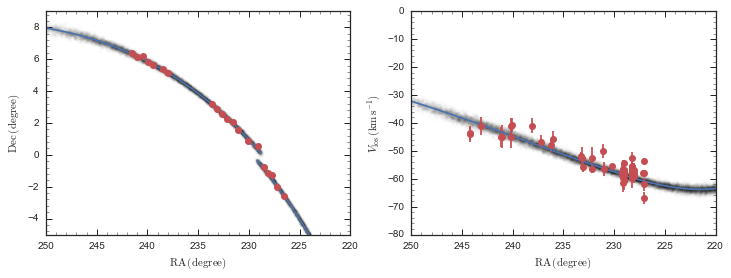

In [10]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(radec_sample_trailing[:,0],radec_sample_trailing[:,1],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],radec_sample_leading[:,1],'k.',
     alpha=0.01,zorder=0)
errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])
subplot(1,2,2)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    sdf_trailing._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    sdf_leading._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(radec_sample_trailing[:,0],lb_sample_trailing[3],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],lb_sample_leading[3],'k.',
     alpha=0.01,zorder=0)
errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])

## The orbit of Pal 5 in different flattened and triaxial potentials

In [11]:
bf_savefilename= 'mwpot14varyc-bf.pkl'
if os.path.exists(bf_savefilename):
    with open(bf_savefilename,'rb') as savefile:
        cs= pickle.load(savefile)
        bf_params= pickle.load(savefile)
else:
    print IOError("Need to calculate best-fit potentials for different c in MWPotential2014-varyc.ipynb first")
bf_params= numpy.array(bf_params)
#bf_params= bf_params[cs <= 3.]
#cs= cs[cs <= 3.]

In [18]:
progs= []
progfs= []
times= numpy.linspace(0.,3.,101)
for bp,c in zip(bf_params,cs):
    pot= MWPotential2014Likelihood.setup_potential(bp,c,False,False,ro,vo)
    prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=ro,vo=vo,
                solarmotion=[-11.1,24.,7.25])
    prog.integrate(times,pot)
    progs.append(prog)
    prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=ro,vo=vo,
                solarmotion=[-11.1,24.,7.25]).flip()
    prog.integrate(times,pot)
    prog._orb.orbit[:,1]*= -1.
    prog._orb.orbit[:,2]*= -1.
    prog._orb.orbit[:,4]*= -1.
    progfs.append(prog)

Vary $c$ along the best-fit line:

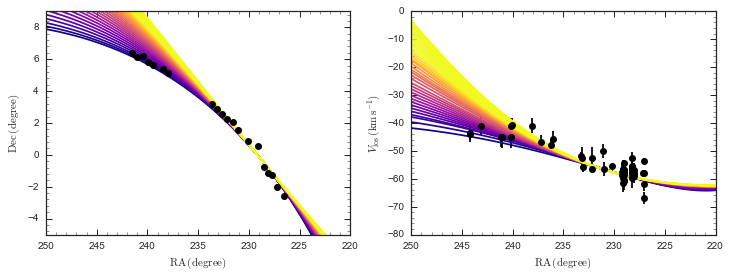

In [31]:
cmap= cm.plasma
for c,orb,orbf in zip(cs,progs,progfs):
    tc= cmap((c-0.5)/2.5)
    subplot(1,2,1)
    orb.plot(d1='ra',d2='dec',color=tc,overplot=True)
    orbf.plot(d1='ra',d2='dec',color=tc,overplot=True)
    subplot(1,2,2)
    orb.plot(d1='ra',d2='vlos',color=tc,overplot=True)
    orbf.plot(d1='ra',d2='vlos',color=tc,overplot=True)
plot_data_add_labels(color='k')

## How does a good $\sigma_v$ vary with the potential?

In [109]:
bf_savefilename= 'mwpot14varyc-bf.pkl'
if os.path.exists(bf_savefilename):
    with open(bf_savefilename,'rb') as savefile:
        cs= pickle.load(savefile)
        bf_params= pickle.load(savefile)
else:
    print IOError("Need to calculate best-fit potentials for different c in MWPotential2014-varyc.ipynb first")
bf_params= numpy.array(bf_params)
bf_params= bf_params[cs <= 3.]
cs= cs[cs <= 3.]

In [81]:
sdf_trailing_varyc= []
sdf_leading_varyc= []
for bp,c in zip(bf_params,cs):
    pot= MWPotential2014Likelihood.setup_potential(bp,c,False,False,ro,vo)
    prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=ro,vo=vo,
                solarmotion=[-11.1,24.,7.25])
    aAI= actionAngleIsochroneApprox(pot=pot,b=0.8)
    sigv= 0.4
    tsdf_trailing= streamdf(sigv/vo,progenitor=prog,
                            pot=pot,aA=aAI,
                            leading=False,nTrackChunks=11,
                            tdisrupt=5./bovy_conversion.time_in_Gyr(vo,ro),
                            ro=ro,vo=vo,R0=ro,
                            vsun=[-11.1,vo+24.,7.25],
                            custom_transform=pal5_util._TPAL5)
    tsdf_leading= streamdf(sigv/vo,progenitor=prog,
                           pot=pot,aA=aAI,
                           leading=True,nTrackChunks=11,
                           tdisrupt=5./bovy_conversion.time_in_Gyr(vo,ro),
                           ro=ro,vo=vo,R0=ro,
                           vsun=[-11.1,vo+24.,7.25],
                           custom_transform=pal5_util._TPAL5)
    sdf_trailing_varyc.append(tsdf_trailing)
    sdf_leading_varyc.append(tsdf_leading)

LinAlgError: Array must not contain infs or NaNs

In [86]:
cs= cs[:24]

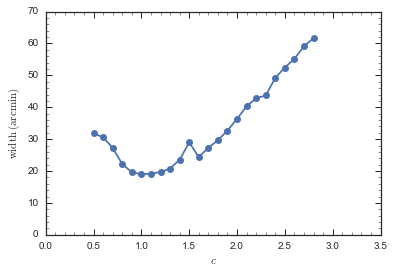

In [87]:
figsize(6,4)
widths_varyc= numpy.zeros(len(cs))
for ii in range(len(cs)):
    widths_varyc[ii]= width_trailing(sdf_trailing_varyc[ii])
bovy_plot.bovy_plot(cs,widths_varyc,'o-',
                    xlabel=r'$c$',ylabel=r'$\mathrm{width}\,(\mathrm{arcmin})$',
                    xrange=[0.,3.5],yrange=[0.,70.])

In [93]:
sdf_trailing_varyc_corrw= []
sdf_leading_varyc_corrw= []
for bp,c,w in zip(bf_params,cs,widths_varyc):
    pot= MWPotential2014Likelihood.setup_potential(bp,c,False,False,ro,vo)
    prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=ro,vo=vo,
                solarmotion=[-11.1,24.,7.25])
    aAI= actionAngleIsochroneApprox(pot=pot,b=0.8)
    sigv= 0.4*(18./w)
    td= 5./bovy_conversion.time_in_Gyr(vo,ro)/*(18./w)
    tsdf_trailing= streamdf(sigv/vo,progenitor=prog,
                            pot=pot,aA=aAI,
                            leading=False,nTrackChunks=11,
                            tdisrupt=td,
                            ro=ro,vo=vo,R0=ro,
                            vsun=[-11.1,vo+24.,7.25],
                            custom_transform=pal5_util._TPAL5)
    tsdf_leading= streamdf(sigv/vo,progenitor=prog,
                           pot=pot,aA=aAI,
                           leading=True,nTrackChunks=11,
                           tdisrupt=td,
                           ro=ro,vo=vo,R0=ro,
                           vsun=[-11.1,vo+24.,7.25],
                           custom_transform=pal5_util._TPAL5)
    sdf_trailing_varyc_corrw.append(tsdf_trailing)
    sdf_leading_varyc_corrw.append(tsdf_leading)

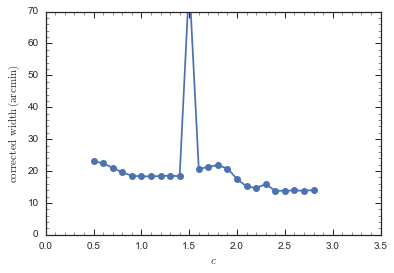

In [95]:
figsize(6,4)
widths_varyc_corrw= numpy.zeros(len(cs))
for ii in range(len(cs)):
    widths_varyc_corrw[ii]= width_trailing(sdf_trailing_varyc_corrw[ii])
bovy_plot.bovy_plot(cs,widths_varyc_corrw,'o-',
                    xlabel=r'$c$',ylabel=r'$\mathrm{corrected\ width}\,(\mathrm{arcmin})$',
                    xrange=[0.,3.5],yrange=[0.,70.])

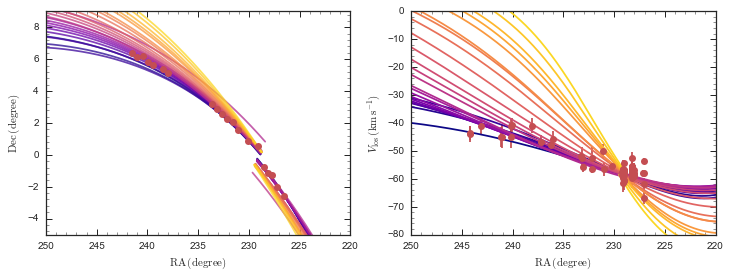

In [98]:
figsize(12,4)
cmap= cm.plasma
maxi= 1001
for ii,c in enumerate(cs):
    tc= cmap((c-0.5)/2.5)
    ttrackRADec_trailing=\
      bovy_coords.lb_to_radec(sdf_trailing_varyc[ii]._interpolatedObsTrackLB[:maxi,0],
                              sdf_trailing_varyc[ii]._interpolatedObsTrackLB[:maxi,1],
                              degree=True)
    ttrackRADec_leading=\
      bovy_coords.lb_to_radec(sdf_leading_varyc[ii]._interpolatedObsTrackLB[:maxi,0],
                              sdf_leading_varyc[ii]._interpolatedObsTrackLB[:maxi,1],
                              degree=True)
    subplot(1,2,1)
    bovy_plot.bovy_plot(ttrackRADec_trailing[:,0],
                        ttrackRADec_trailing[:,1],
                        color=tc,overplot=True,alpha=0.75)
    bovy_plot.bovy_plot(ttrackRADec_leading[:,0],
                        ttrackRADec_leading[:,1],
                        color=tc,overplot=True,alpha=0.75)
    subplot(1,2,2)
    bovy_plot.bovy_plot(ttrackRADec_trailing[:,0],
                        sdf_trailing_varyc[ii]._interpolatedObsTrackLB[:maxi,3],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(ttrackRADec_leading[:,0],
                        sdf_leading_varyc[ii]._interpolatedObsTrackLB[:maxi,3],
                        color=tc,overplot=True)
plot_data_add_labels()

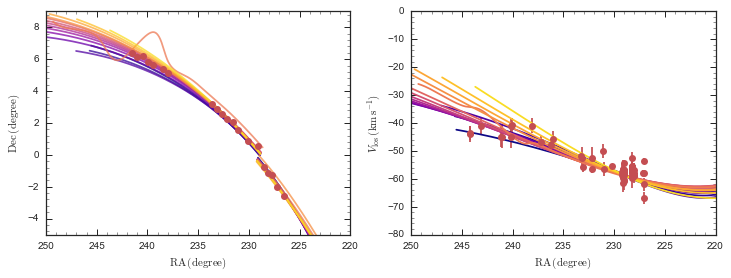

In [100]:
figsize(12,4)
cmap= cm.plasma
maxi= 1001
for ii,c in enumerate(cs[:15]):
    tc= cmap((c-0.5)/1.5)
    ttrackRADec_trailing=\
      bovy_coords.lb_to_radec(sdf_trailing_varyc_corrw[ii]._interpolatedObsTrackLB[:maxi,0],
                              sdf_trailing_varyc_corrw[ii]._interpolatedObsTrackLB[:maxi,1],
                              degree=True)
    ttrackRADec_leading=\
      bovy_coords.lb_to_radec(sdf_leading_varyc_corrw[ii]._interpolatedObsTrackLB[:maxi,0],
                              sdf_leading_varyc_corrw[ii]._interpolatedObsTrackLB[:maxi,1],
                              degree=True)
    subplot(1,2,1)
    bovy_plot.bovy_plot(ttrackRADec_trailing[:,0],
                        ttrackRADec_trailing[:,1],
                        color=tc,overplot=True,alpha=0.75)
    bovy_plot.bovy_plot(ttrackRADec_leading[:,0],
                        ttrackRADec_leading[:,1],
                        color=tc,overplot=True,alpha=0.75)
    subplot(1,2,2)
    bovy_plot.bovy_plot(ttrackRADec_trailing[:,0],
                        sdf_trailing_varyc_corrw[ii]._interpolatedObsTrackLB[:maxi,3],
                        color=tc,overplot=True)
    bovy_plot.bovy_plot(ttrackRADec_leading[:,0],
                        sdf_leading_varyc_corrw[ii]._interpolatedObsTrackLB[:maxi,3],
                        color=tc,overplot=True)
plot_data_add_labels()

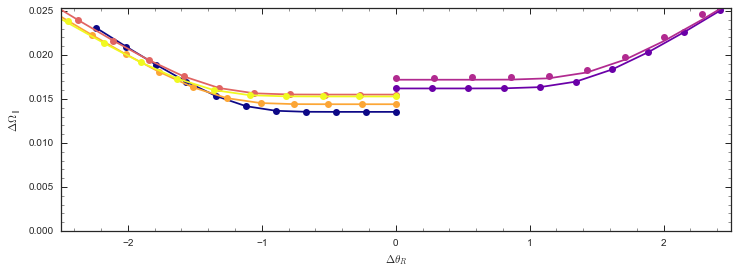

In [69]:
sdf_trailing_varyc[0].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][0]-0.5)/2.5),xrange=[-2.5,2.5])
sdf_trailing_varyc[1].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][1]-0.5)/2.5),overplot=True)
sdf_trailing_varyc[2].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][2]-0.5)/2.5),overplot=True)
sdf_trailing_varyc[3].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][3]-0.5)/2.5),overplot=True)
sdf_trailing_varyc[4].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][4]-0.5)/2.5),overplot=True)
sdf_trailing_varyc[5].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][5]-0.5)/2.5),overplot=True)

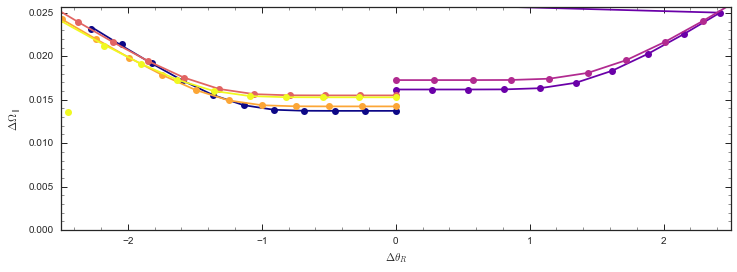

In [70]:
sdf_leading_varyc[0].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][0]-0.5)/2.5),xrange=[-2.5,2.5])
sdf_leading_varyc[1].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][1]-0.5)/2.5),overplot=True)
sdf_leading_varyc[2].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][2]-0.5)/2.5),overplot=True)
sdf_leading_varyc[3].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][3]-0.5)/2.5),overplot=True)
sdf_leading_varyc[4].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][4]-0.5)/2.5),overplot=True)
sdf_leading_varyc[5].plotCompareTrackAAModel(color=cmap((cs[::5][:-2][5]-0.5)/2.5),overplot=True)

In [110]:
len(cs)

26

In [113]:
pot= MWPotential2014Likelihood.setup_potential(bf_params[24],cs[24],False,False,ro,vo)
prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=ro,vo=vo,
            solarmotion=[-11.1,24.,7.25])
aAI= actionAngleIsochroneApprox(pot=pot,b=0.8)
sigv= 0.4
tsdf_leading= streamdf(sigv/vo,progenitor=prog,
                        pot=pot,aA=aAI,
                        leading=True,nTrackChunks=11,
                        tdisrupt=5./bovy_conversion.time_in_Gyr(vo,ro),
                        ro=ro,vo=vo,R0=ro,
                        vsun=[-11.1,vo+24.,7.25],
                        custom_transform=pal5_util._TPAL5,
                      nosetup=True)

In [114]:
tsdf_leading._determine_nTrackIterations(None)

In [115]:
tsdf_leading._determine_stream_track(11)

In [ ]:
tsdf_leading._useInterp= True

In [ ]:
tsdf_leading._interpolate_stream_track()

In [ ]:
tsdf_leading._interpolate_stream_track_aA()

In [ ]:
tsdf_leading.calc_stream_lb()

In [ ]:
tsdf_leading._determine_stream_spread()

In [ ]:
ttrackRADec_trailing=\
bovy_coords.lb_to_radec(tsdf_leading._interpolatedObsTrackLB[:maxi,0],
                        tsdf_leading._interpolatedObsTrackLB[:maxi,1],
                        degree=True)
subplot(1,2,1)
bovy_plot.bovy_plot(ttrackRADec_trailing[:,0],
                    ttrackRADec_trailing[:,1],
                    color=tc,overplot=True,alpha=0.75)
plot_data_add_labels()

Setup the progenitor orbit and figure out a good actionAngleIsochroneApprox. We'll take the values from Fritz & Kallivayalil, and compare them to their stream positions and to the Kuzma et al. radial velocities. Provided we put Pal 5 at the maximum possible distance, this fits well:

In [2]:
prog= Orbit([229.018,-0.124,23.2,-2.296,-2.257,-58.7],radec=True,ro=R0,vo=V0,
            solarmotion=[-11.1,24.,7.25])
aAI= actionAngleIsochroneApprox(pot=MWPotential2014,b=0.8)
sigv= 0.6

In [3]:
sdf_trailing= streamdf(sigv/220.,progenitor=prog,
                       pot=MWPotential2014,aA=aAI,
                       leading=False,nTrackChunks=11,
                       tdisrupt=5./bovy_conversion.time_in_Gyr(V0,R0),
                       Rnorm=R0,Vnorm=V0,R0=R0,
                       vsun=[-11.1,V0+24.,7.25],
                       custom_transform=pal5_util._TPAL5)
sdf_leading= streamdf(sigv/220.,progenitor=prog,
                      pot=MWPotential2014,aA=aAI,
                      leading=True,nTrackChunks=11,
                      tdisrupt=5./bovy_conversion.time_in_Gyr(V0,R0),
                      Rnorm=R0,Vnorm=V0,R0=R0,
                      vsun=[-11.1,V0+24.,7.25],
                      custom_transform=pal5_util._TPAL5)
trackRADec_trailing=\
  bovy_coords.lb_to_radec(sdf_trailing._interpolatedObsTrackLB[:,0],
                          sdf_trailing._interpolatedObsTrackLB[:,1],
                          degree=True)
trackRADec_leading=\
  bovy_coords.lb_to_radec(sdf_leading._interpolatedObsTrackLB[:,0],
                          sdf_leading._interpolatedObsTrackLB[:,1],
                          degree=True)

In [18]:
cindx= numpy.argmin(numpy.fabs(trackRADec_trailing[:,0]-235.))
xy= [sdf_trailing._interpolatedObsTrackLB[cindx,0],None,None,None,None,None]
print xy
2.355*60.*numpy.sqrt(sdf_trailing.gaussApprox(xy=xy,lb=True,
                                             cindx=range(len(trackRADec_trailing))[cindx])[1][0,0])

[10.548744569536701, None, None, None, None, None]
(array([[1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5]]), array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]]))


18.383279709897248

(210.0, 250.0)

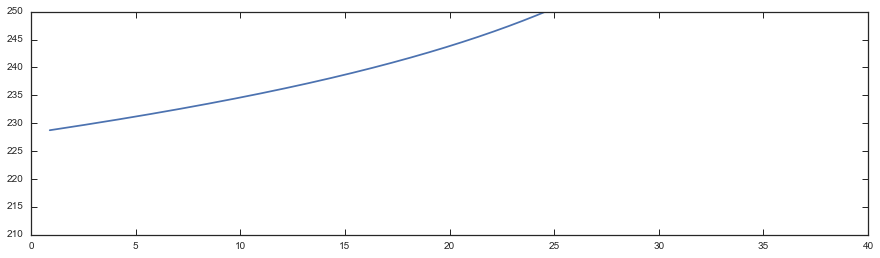

In [121]:
plot(sdf_trailing._interpolatedObsTrackLB[:,0],trackRADec_trailing[:,0])
ylim(210.,250.)

In [15]:
lb_sample_trailing= sdf_trailing.sample(n=10000,lb=True)
lb_sample_leading= sdf_leading.sample(n=10000,lb=True)
radec_sample_trailing= bovy_coords.lb_to_radec(lb_sample_trailing[0],
                                               lb_sample_trailing[1],
                                               degree=True)
radec_sample_leading= bovy_coords.lb_to_radec(lb_sample_leading[0],
                                              lb_sample_leading[1],
                                              degree=True)

In [16]:
print "Physical length: %f kpc (leading,trailing)=(%f,%f) kpc" % \
    (sdf_leading.length(phys=True)+sdf_trailing.length(phys=True),
     sdf_leading.length(phys=True),sdf_trailing.length(phys=True))
print "Angular length: %f deg (leading,trailing)=(%f,%f) deg" % \
    (sdf_leading.length(ang=True)+sdf_trailing.length(ang=True),
     sdf_leading.length(ang=True),sdf_trailing.length(ang=True))
print "Angular width (FWHM): %f arcmin" % (2.355*60.*numpy.std(radec_sample_trailing[numpy.fabs(radec_sample_trailing[:,0]-235.) < .05,1]))

Physical length: 41.034817 kpc (leading,trailing)=(24.058950,16.975868) kpc
Angular length: 132.321766 deg (leading,trailing)=(87.222876,45.098890) deg
Angular width (FWHM): 20.683174 arcmin


In [99]:
pos_radec= numpy.array([[241.48,6.41,0.09],
                        [240.98,6.15,0.09],
                        [240.48,6.20,0.09],
                        [239.98,5.81,0.09],
                        [239.48,5.64,0.09],
                        [238.48,5.38,0.09],
                        [237.98,5.14,0.09],
                        [233.61,3.17,0.06],
                        [233.11,2.88,0.06],
                        [232.61,2.54,0.06],
                        [232.11,2.23,0.06],
                        [231.61,2.04,0.06],
                        [231.11,1.56,0.06],
                        [230.11,0.85,0.06],
                        [229.11,0.54,0.06],
                        [228.48,-0.77,0.11],
                        [228.11,-1.16,0.14],
                        [227.73,-1.28,0.11],
                        [227.23,-2.03,0.17],
                        [226.55,-2.59,0.14]])
rvel_ra= numpy.array([[225+15*15/60+48.19*0.25/60,-55.9,1.2],
                        [225+15*15/60+49.70*0.25/60,-56.9,0.4],
                        [225+15*15/60+52.60*0.25/60,-56.0,0.6],
                        [225+15*15/60+54.79*0.25/60,-57.6,1.6],
                        [225+15*15/60+56.11*0.25/60,-57.9,0.7],
                        [225+15*15/60+57.05*0.25/60,-55.6,1.5],
                        [225+15*15/60+58.26*0.25/60,-56.4,1.0],
                        [225+15*15/60+58.89*0.25/60,-55.9,0.3],
                        [225+15*15/60+59.52*0.25/60,-59.0,0.4],
                        [225+16*15/60+02.00*0.25/60,-58.0,0.8],
                        [225+16*15/60+03.61*0.25/60,-57.7,2.5],
                        [225+16*15/60+04.81*0.25/60,-57.2,2.7],
                        [225+16*15/60+06.54*0.25/60,-57.1,0.2],
                        [225+16*15/60+07.75*0.25/60,-60.6,0.3],
                        [225+16*15/60+08.51*0.25/60,-60.9,3.3],
                        [225+16*15/60+19.83*0.25/60,-56.9,1.0],
                        [225+16*15/60+23.11*0.25/60,-58.0,2.5],
                        [225+16*15/60+34.71*0.25/60,-58.2,3.8],
                        [225+16*15/60+08.66*0.25/60,-56.8,0.7],
                        [225+16*15/60+09.58*0.25/60,-57.7,0.3],
                        [225+15*15/60+52.84*0.25/60,-55.7,0.6],
                        [225+15*15/60+56.21*0.25/60,-55.9,0.7],
                        [225+16*15/60+05.26*0.25/60,-54.3,0.3],
                        [225+17*15/60+09.99*0.25/60,-57.0,0.4],
                        [225+17*15/60+34.55*0.25/60,-56.5,3.1],
                        [225+17*15/60+58.32*0.25/60,-57.5,3.3],
                        [225+18*15/60+04.96*0.25/60,-57.7,2.6],
                        [225+18*15/60+18.92*0.25/60,-57.6,3.6],
                        [225+18*15/60+35.89*0.25/60,-56.7,1.3],
                        [225+19*15/60+21.42*0.25/60,-61.7,3.1],
                        [225+21*15/60+51.16*0.25/60,-55.6,0.4],
                        [225+24*15/60+04.85*0.25/60,-56.5,2.6],
                        [225+24*15/60+13.00*0.25/60,-50.0,2.4],
                        [225+28*15/60+39.20*0.25/60,-56.6,1.4],
                        [225+28*15/60+49.34*0.25/60,-52.4,3.8],
                        [225+34*15/60+19.31*0.25/60,-55.8,1.8],
                        [225+34*15/60+31.90*0.25/60,-52.7,4.0],
                        [225+34*15/60+56.51*0.25/60,-51.9,1.6],
                        [225+45*15/60+10.57*0.25/60,-45.6,2.6],
                        [225+46*15/60+49.44*0.25/60,-48.0,2.4],
                        [225+48*15/60+57.99*0.25/60,-46.7,2.3],
                        [225+55*15/60+24.13*0.25/60,-41.0,2.7],
                        [240+0*15/60+45.41*0.25/60,-41.1,2.8],
                        [240+1*15/60+12.59*0.25/60,-40.8,2.5],
                        [240+3*15/60+29.59*0.25/60,-45.2,3.9],
                        [240+4*15/60+05.53*0.25/60,-44.9,4.0],
                        [240+4*15/60+33.28*0.25/60,-45.1,3.5],
                        [240+13*15/60+40.97*0.25/60,-41.1,3.4],
                        [240+16*15/60+44.79*0.25/60,-44.0,3.0],
                        [240+16*15/60+51.73*0.25/60,-43.5,2.5],
                        [225+8*15/60+07.15*0.25/60,-57.8,1.1],
                        [225+8*15/60+17.50*0.25/60,-62.0,2.3],
                        [225+10*15/60+39.02*0.25/60,-58.0,1.0],
                        [225+11*15/60+09.04*0.25/60,-66.9,2.1],
                        [225+11*15/60+21.70*0.25/60,-53.8,1.1],
                        [225+12*15/60+45.44*0.25/60,-52.5,2.2],
                        [225+13*15/60+40.44*0.25/60,-58.6,1.4],
                        [225+13*15/60+54.40*0.25/60,-59.8,3.7],
                        [225+14*15/60+09.32*0.25/60,-57.9,3.5],
                        [225+14*15/60+17.18*0.25/60,-59.2,1.7],
                        [225+14*15/60+20.71*0.25/60,-56.7,2.3],
                        [225+14*15/60+34.63*0.25/60,-59.1,1.3],
                        [225+15*15/60+16.47*0.25/60,-58.6,2.3],
                        [225+15*15/60+50.43*0.25/60,-55.7,2.3],
                        [225+16*15/60+01.54*0.25/60,-58.7,1.4],
                        [225+16*15/60+34.95*0.25/60,-59.7,0.4],
                        [225+16*15/60+56.20*0.25/60,-58.7,0.2]])
dm_xi= numpy.array([[13.5,0.14,0.09],
                    [8.,0.05,0.03],
                    [4.5,0.01,0.02],
                    [2.,0.00,0.02],
                    [0.,0.00,0.01],
                    [-2.,-0.02,0.04],
                    [-4.,-0.09,0.04]])

In [100]:
xieta_sample_trailing= pal5_util.radec_to_pal5xieta(radec_sample_trailing[:,0],
                                                   radec_sample_trailing[:,1],
                                                   degree=True)
xieta_sample_leading= pal5_util.radec_to_pal5xieta(radec_sample_leading[:,0],
                                                  radec_sample_leading[:,1],
                                                  degree=True)
trackxieta_trailing=\
  pal5_util.radec_to_pal5xieta(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],degree=True)
trackxieta_leading=\
  pal5_util.radec_to_pal5xieta(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],degree=True)
pos_xieta= pal5_util.radec_to_pal5xieta(pos_radec[:,0],pos_radec[:,1],
                                        degree=True)

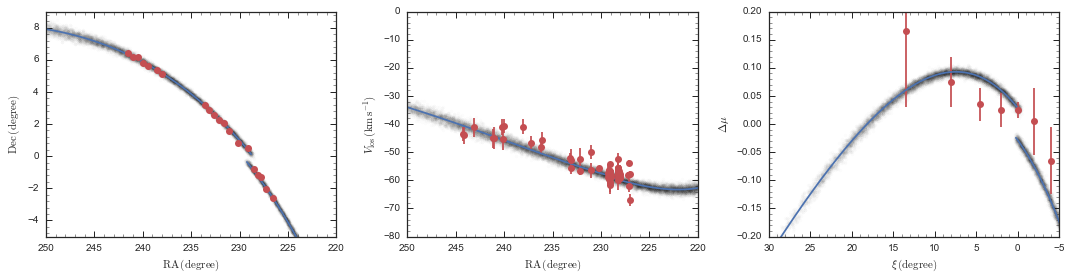

In [101]:
figsize(15,4)
subplot(1,3,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(radec_sample_trailing[:,0],radec_sample_trailing[:,1],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],radec_sample_leading[:,1],'k.',
     alpha=0.01,zorder=0)
errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])
subplot(1,3,2)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    sdf_trailing._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    sdf_leading._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(radec_sample_trailing[:,0],lb_sample_trailing[3],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],lb_sample_leading[3],'k.',
     alpha=0.01,zorder=0)
errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])
subplot(1,3,3)
bovy_plot.bovy_plot(trackxieta_trailing[:,0],
                    5.*numpy.log10(sdf_trailing._interpolatedObsTrackLB[:,2]/23.2),
                    color=sns.color_palette()[0],
                    xrange=[30.,-5.],
                    yrange=[-0.2,0.2],
                    xlabel=r'$\xi\,(\mathrm{degree})$',
                    ylabel=r'$\Delta \mu$',
                   gcf=True)
bovy_plot.bovy_plot(trackxieta_leading[:,0],
                    5.*numpy.log10(sdf_leading._interpolatedObsTrackLB[:,2]/23.2),
                    color=sns.color_palette()[0],
                    overplot=True)
plot(xieta_sample_trailing[:,0],5.*numpy.log10(lb_sample_trailing[2]/23.2),'k.',
     alpha=0.01,zorder=0)
plot(xieta_sample_leading[:,0],5.*numpy.log10(lb_sample_leading[2]/23.2),'k.',
     alpha=0.01,zorder=0)
errorbar(dm_xi[:,0],dm_xi[:,1]+0.025,yerr=1.5*dm_xi[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])
tight_layout()

(-10.0, 10)

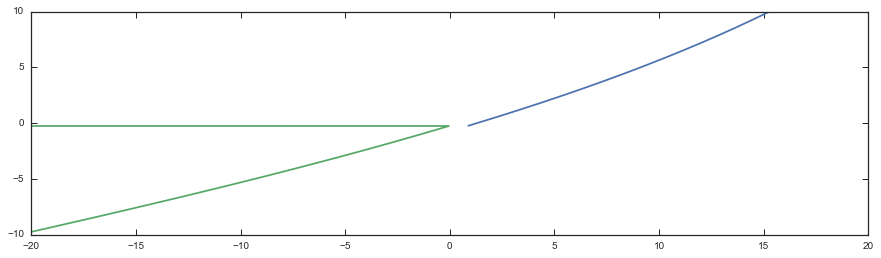

In [72]:
plot(sdf_trailing._interpolatedObsTrackLB[:,0],trackxieta_trailing[:,0])
plot(sdf_leading._interpolatedObsTrackLB[:,0]-360.,trackxieta_leading[:,0])
xlim(-20.,20.)
ylim(-10.,10)

In [21]:
from galpy.potential import TriaxialNFWPotential
pot_flat= [MWPotential2014[0],MWPotential2014[1],TriaxialNFWPotential(a=2.,normalize=.35,c=0.7)]
aAI_flat= actionAngleIsochroneApprox(pot=pot_flat,b=0.8)
sdf_trailing_flat= streamdf(sigv/220.,progenitor=prog,
                           pot=pot_flat,aA=aAI_flat,
                           leading=False,nTrackChunks=11,
                           tdisrupt=5./bovy_conversion.time_in_Gyr(V0,R0),
                           Rnorm=R0,Vnorm=V0,R0=R0,
                           vsun=[-11.1,V0+24.,7.25],
                           custom_transform=pal5_util._TPAL5)

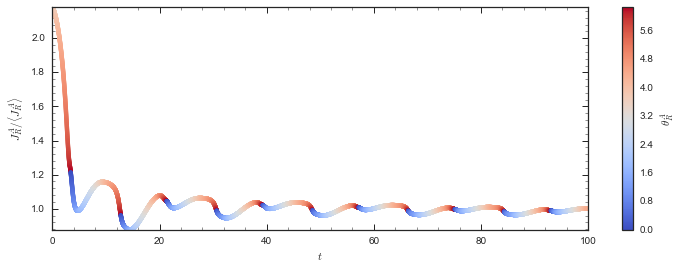

In [24]:
aAI_flat.plot(prog(),type='jr',cmap='coolwarm')

In [25]:
trackRADec_trailing_flat=\
  bovy_coords.lb_to_radec(sdf_trailing_flat._interpolatedObsTrackLB[:,0],
                          sdf_trailing_flat._interpolatedObsTrackLB[:,1],
                          degree=True)

<Container object of 3 artists>

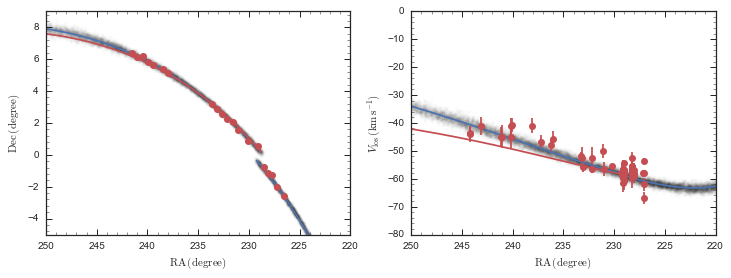

In [26]:
figsize(12,4)
subplot(1,2,1)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-5.,9.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$\mathrm{Dec}\,(\mathrm{degree})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
bovy_plot.bovy_plot(trackRADec_trailing_flat[:,0],
                    trackRADec_trailing_flat[:,1],
                    color=sns.color_palette()[2],
                    overplot=True)
plot(radec_sample_trailing[:,0],radec_sample_trailing[:,1],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],radec_sample_leading[:,1],'k.',
     alpha=0.01,zorder=0)
errorbar(pos_radec[:,0],pos_radec[:,1],yerr=pos_radec[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])
subplot(1,2,2)
bovy_plot.bovy_plot(trackRADec_trailing[:,0],
                    sdf_trailing._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    xrange=[250.,220.],
                    yrange=[-80.,0.],
                    xlabel=r'$\mathrm{RA}\,(\mathrm{degree})$',
                    ylabel=r'$V_{\mathrm{los}}\,(\mathrm{km\,s}^{-1})$',
                   gcf=True)
bovy_plot.bovy_plot(trackRADec_leading[:,0],
                    sdf_leading._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[0],
                    overplot=True)
bovy_plot.bovy_plot(trackRADec_trailing_flat[:,0],
                    sdf_trailing_flat._interpolatedObsTrackLB[:,3],
                    color=sns.color_palette()[2],
                    overplot=True)
plot(radec_sample_trailing[:,0],lb_sample_trailing[3],'k.',
     alpha=0.01,zorder=0)
plot(radec_sample_leading[:,0],lb_sample_leading[3],'k.',
     alpha=0.01,zorder=0)
errorbar(rvel_ra[:,0],rvel_ra[:,1],yerr=rvel_ra[:,2],
        ls='none',marker='o',color=sns.color_palette()[2])

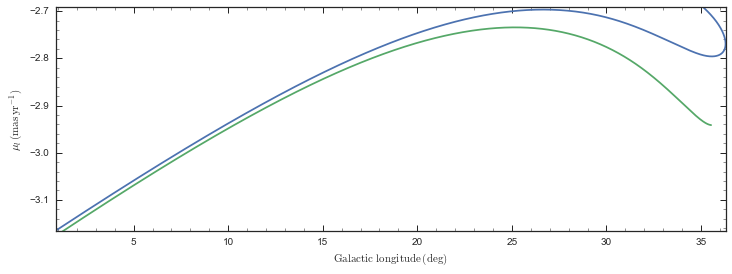

In [31]:
sdf_trailing_flat.plotTrack(d1='ll',d2='pmll')
sdf_trailing.plotTrack(d1='ll',d2='pmll',overplot=True)

In [106]:
print "Physical length: %f kpc (leading,trailing)=(%f,%f) kpc" % \
    (sdf_leading.length(phys=True)+sdf_trailing.length(phys=True),
     sdf_leading.length(phys=True),sdf_trailing.length(phys=True))
print "Angular length: %f deg (leading,trailing)=(%f,%f) deg" % \
    (sdf_leading.length(ang=True)+sdf_trailing.length(ang=True),
     sdf_leading.length(ang=True),sdf_trailing.length(ang=True))
print "Angular width (FWHM): %f arcmin" % (2.355*60.*numpy.std(radec_sample_trailing[numpy.fabs(radec_sample_trailing[:,0]-235.) < .05,1]))

Physical length: 31.085421 kpc (leading,trailing)=(18.087126,12.998295) kpc
Angular length: 92.877256 deg (leading,trailing)=(57.348529,35.528727) deg
Angular width (FWHM): 14.050329 arcmin


Also in $(\xi,\eta)$ coordinates

In [9]:
xieta_sample_trailing= pal5_util.radec_to_pal5xieta(radec_sample_trailing[:,0],
                                                   radec_sample_trailing[:,1],
                                                   degree=True)
xieta_sample_leading= pal5_util.radec_to_pal5xieta(radec_sample_leading[:,0],
                                                  radec_sample_leading[:,1],
                                                  degree=True)
trackxieta_trailing=\
  pal5_util.radec_to_pal5xieta(trackRADec_trailing[:,0],
                    trackRADec_trailing[:,1],degree=True)
trackxieta_leading=\
  pal5_util.radec_to_pal5xieta(trackRADec_leading[:,0],
                    trackRADec_leading[:,1],degree=True)
pos_xieta= pal5_util.radec_to_pal5xieta(pos_radec[:,0],pos_radec[:,1],
                                        degree=True)

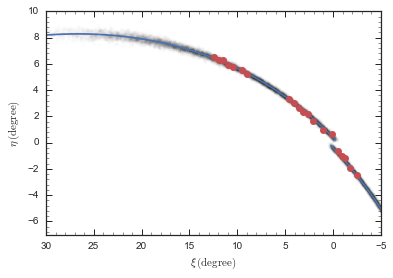

In [10]:
figsize(6,4)
bovy_plot.bovy_plot(trackxieta_trailing[:,0],
                    trackxieta_trailing[:,1],
                    color=sns.color_palette()[0],
                    xrange=[30.,-5.],
                    yrange=[-7.,10.],
                    xlabel=r'$\xi\,(\mathrm{degree})$',
                    ylabel=r'$\eta\,(\mathrm{degree})$')
bovy_plot.bovy_plot(trackxieta_leading[:,0],
                    trackxieta_leading[:,1],
                    color=sns.color_palette()[0],
                    overplot=True)
plot(xieta_sample_trailing[:,0],xieta_sample_trailing[:,1],'k.',
     alpha=0.01,zorder=0)
plot(xieta_sample_leading[:,0],xieta_sample_leading[:,1],'k.',
     alpha=0.01,zorder=0)
plot(pos_xieta[:,0],pos_xieta[:,1],
        ls='none',marker='o',color=sns.color_palette()[2])

Density in $(\xi,\eta)$ coordinates:

(-15.0, 40)

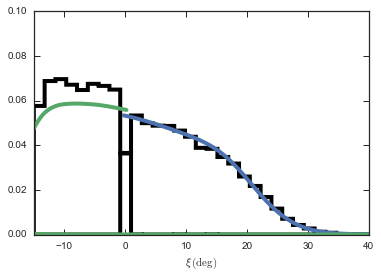

In [11]:
dens_xi= numpy.array([sdf_trailing.density_par(x,coord='customra') for x in sdf_trailing._interpolatedThetasTrack])
plot(trackxieta_trailing[:,0],
     dens_xi/numpy.sum(dens_xi*(
     numpy.roll(trackxieta_trailing[:,0],-1)-trackxieta_trailing[:,0])),lw=4.)
dum= hist(xieta_sample_trailing[:,0],range=[-15.,40.],bins=31,normed=True,histtype='step',lw=4.,color='k')
dens_xi= numpy.array([sdf_leading.density_par(x,coord='customra') for x in sdf_leading._interpolatedThetasTrack])
plot(trackxieta_leading[:,0],
     -dens_xi/numpy.sum(dens_xi*(
     numpy.roll(trackxieta_leading[:,0],-1)-trackxieta_leading[:,0])),lw=4.)
dum= hist(xieta_sample_leading[:,0],range=[-15.,40.],bins=31,normed=True,histtype='step',lw=4.,color='k')
xlabel(r'$\xi\,(\mathrm{deg})$')
ylim(0.,0.1)
xlim(-15.,40)

## Number of subhalo encounters expected (preliminary investigation)

In [12]:
def nsubhalo(m):
    return 0.3*(10.**6.5/m)
def bmax(m):
    return 0.075*(m/10.**6.5)**0.5

In [13]:
ms= 10.**(numpy.linspace(4.,9.,201))
def dNencdm(m):
    return sdf_trailing.subhalo_encounters(sigma=120./220.,nsubhalo=nsubhalo(m),
                                                      bmax=bmax(m))\
           +sdf_leading.subhalo_encounters(sigma=120./220.,nsubhalo=nsubhalo(m),
                                                      bmax=bmax(m))
dndm= numpy.array([dNencdm(m) for m in ms])

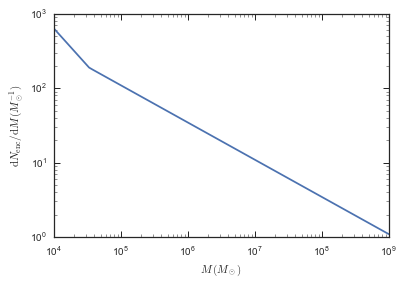

In [14]:
loglog(ms,dndm)
xlabel(r'$M\,(M_\odot)$')
ylabel(r'$\mathrm{d} N_\mathrm{enc} / \mathrm{d} M\,(M^{-1}_\odot)$')

In [15]:
print "Pal 5 should have %f encounters with subhalos more massive than 10^5 Msolar over its lifetime" \
    % (dNencdm(10.**5.5)+dNencdm(10.**6.5)+dNencdm(10.**7.5)+dNencdm(10.**8.5)+dNencdm(10.**9.5))
print "Pal 5 should have %f encounters with subhalos more massive than 10^6 Msolar over its lifetime" \
    % (dNencdm(10.**6.5)+dNencdm(10.**7.5)+dNencdm(10.**8.5)+dNencdm(10.**9.5))
print "Pal 5 should have %f encounters with subhalos more massive than 10^7 Msolar over its lifetime" \
    % (dNencdm(10.**7.5)+dNencdm(10.**8.5)+dNencdm(10.**9.5))
print "Pal 5 should have %f encounters with subhalos more massive than 10^8 Msolar over its lifetime" \
    % (dNencdm(10.**8.5)+dNencdm(10.**9.5))

Pal 5 should have 89.518953 encounters with subhalos more massive than 10^5 Msolar over its lifetime
Pal 5 should have 28.114200 encounters with subhalos more massive than 10^6 Msolar over its lifetime
Pal 5 should have 8.696312 encounters with subhalos more massive than 10^7 Msolar over its lifetime
Pal 5 should have 2.555836 encounters with subhalos more massive than 10^8 Msolar over its lifetime
